<a href="https://colab.research.google.com/github/caiman16/shopifyTest/blob/main/Fall_2022_data_science_intern_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fall 2022 Data Science Intern Challenge

## Question 1

Given some sample data, write a program to answer the following: [click here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
* b. What metric would you report for this dataset?
* c. What is its value?


In [ ]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the data into a DataFrame
sheet_url = 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url_1)
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### a. Answer:

Here we can see that for the order amount, the mean is rightly so \$3145.13, but we also see that the standard deviation is \$41282.54, which indicates that the data is very spread out. We can also see this in the quartiles, as 75% of the orders are for \$390.00 or less, while the max value is of \$704000.00. This indicates that there are some outliers that are pulling the mean to towards a higher value.

We can verify this using a boxplot.

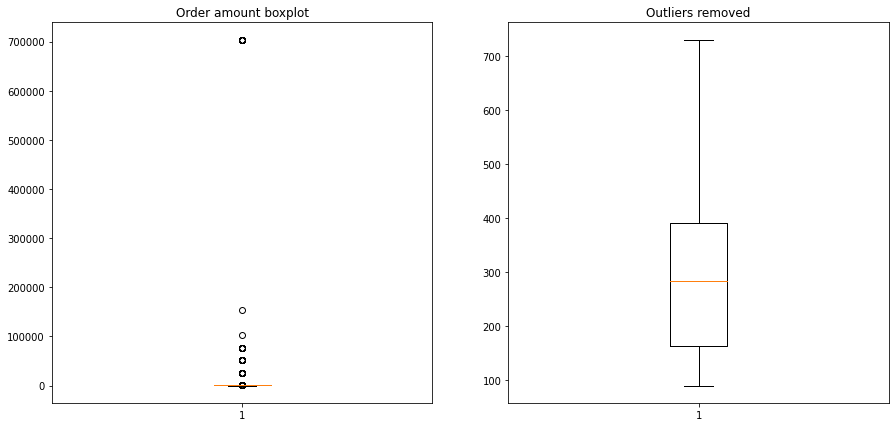

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.set_title('Order amount boxplot')
ax1.boxplot(df.order_amount)
ax2.set_title('Outliers removed')
ax2.boxplot(df.order_amount, showfliers=False)
fig1.show()

As such, we should either use the median to have a better understanding of the center tedency value, or we should remove the outliers using the IQR.

We will first remove the outliers.

In [ ]:
cols = ['order_amount']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

filtered_df = df[condition]

In [ ]:
filtered_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


We find then that the mean value without the outliers is \$293.72, which is more reasonable.

Now, for the median:

In [ ]:
df['order_amount'].median()

284.0

The value is $284.00, which is very near the value that we found by removing the outliers.

## Question 1 Answers:

So, to recapitulate:

* a. There are outliars that are skewing the mean towards the high numbers, so we should remove them or find another central tendency value.
* b. I would use the median for an initial exploratory analysis and also remove the outliars and then do the mean. Then, I would compare both results.
* c. If I use the median, the value is \$284.00. If I use the mean without the outliars, the value is \$293.72.

## Question 2

For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

* a. How many orders were shipped by Speedy Express in total?
* b. What is the last name of the employee with the most orders?
* c. What product was ordered the most by customers in Germany?


### a.

Query:
> SELECT * FROM \[Orders] WHERE ShipperID = (SELECT ShipperID FROM \[Shippers] WHERE ShipperName='Speedy Express')

Answer = 54

### b. 
Query:
> SELECT LastName, COUNT(Employees.EmployeeID) AS TotalOrders FROM Employees
LEFT JOIN Orders ON Employees.EmployeeID=Orders.EmployeeID
GROUP BY LastName
ORDER BY TotalOrders DESC;

Answer = Peacock

### c.

Query:
>SELECT ProductName, COUNT(Products.ProductID) AS NumberOfOrders FROM Products
JOIN OrderDetails ON Products.ProductID=OrderDetails.ProductID
JOIN Orders ON OrderDetails.OrderID=Orders.OrderID
JOIN Customers ON Orders.CustomerID=Customers.CustomerID WHERE Country='Germany'
GROUP BY ProductName
ORDER BY NumberOfOrders DESC;

Answer = Gorgonzola Telino